# Predict Product demand  using time series regressions:

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import statsmodels.api as sm
import seaborn as sb

# Data load

In [2]:
df=pd.read_csv('Historical Product Demand.csv')

# Dataset

In [3]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [4]:
df.tail()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50
1048574,Product_0704,Whse_J,Category_001,2016/6/27,4


In [5]:
df.shape

(1048575, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [7]:
df.isna().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [8]:
df.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [9]:

#Since the number of missing values are about 1%, I am  removing them.
df.dropna(axis=0, inplace=True) #remove all rows with na's.

df.sort_values(by='Date', inplace=True)
df.reset_index(drop=True)


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0965,Whse_A,Category_006,2011/1/8,2
1,Product_0412,Whse_S,Category_007,2011/10/20,(2)
2,Product_0125,Whse_S,Category_011,2011/10/20,(2)
3,Product_0642,Whse_C,Category_019,2011/10/31,3
4,Product_2137,Whse_S,Category_009,2011/11/18,(25)
...,...,...,...,...,...
1037331,Product_0689,Whse_J,Category_011,2017/1/6,200
1037332,Product_1970,Whse_J,Category_005,2017/1/6,2000
1037333,Product_1904,Whse_C,Category_019,2017/1/9,4000
1037334,Product_0471,Whse_C,Category_015,2017/1/9,30


In [10]:
set(df['Warehouse'])

{'Whse_A', 'Whse_C', 'Whse_J', 'Whse_S'}

In [11]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44799,Product_0965,Whse_A,Category_006,2011/1/8,2
131429,Product_0412,Whse_S,Category_007,2011/10/20,(2)
131426,Product_0125,Whse_S,Category_011,2011/10/20,(2)
75193,Product_0642,Whse_C,Category_019,2011/10/31,3
131026,Product_2137,Whse_S,Category_009,2011/11/18,(25)


# Some of the values have () in them.
# Target Feature - Order_Demand
# Removing () from the target feature.

In [12]:
df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")
#change the data typeto int
df['Order_Demand'] = df['Order_Demand'].astype('int64')

C:\Users\ankit\AppData\Local\Temp/ipykernel_19868/1602077442.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
C:\Users\ankit\AppData\Local\Temp/ipykernel_19868/1602077442.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")


In [13]:
df['Date']=pd.to_datetime(df['Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 44799 to 908447
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1037336 non-null  object        
 1   Warehouse         1037336 non-null  object        
 2   Product_Category  1037336 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1037336 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 47.5+ MB


In [15]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44799,Product_0965,Whse_A,Category_006,2011-01-08,2
131429,Product_0412,Whse_S,Category_007,2011-10-20,2
131426,Product_0125,Whse_S,Category_011,2011-10-20,2
75193,Product_0642,Whse_C,Category_019,2011-10-31,3
131026,Product_2137,Whse_S,Category_009,2011-11-18,25


# statistical plot

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


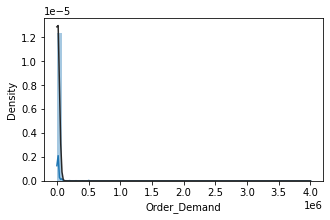

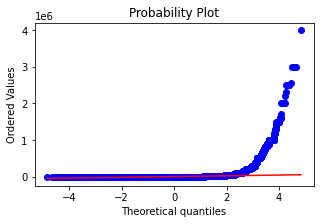

In [16]:
import seaborn as sns
from scipy.stats import norm, skew #for some statistics
from scipy import stats #qqplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import norm, skew #for some statistics
rcParams['figure.figsize'] = 5,3
sns.distplot(df['Order_Demand'],fit=norm)
#Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Order_Demand'], plot=plt)
plt.show()

# time line graph

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


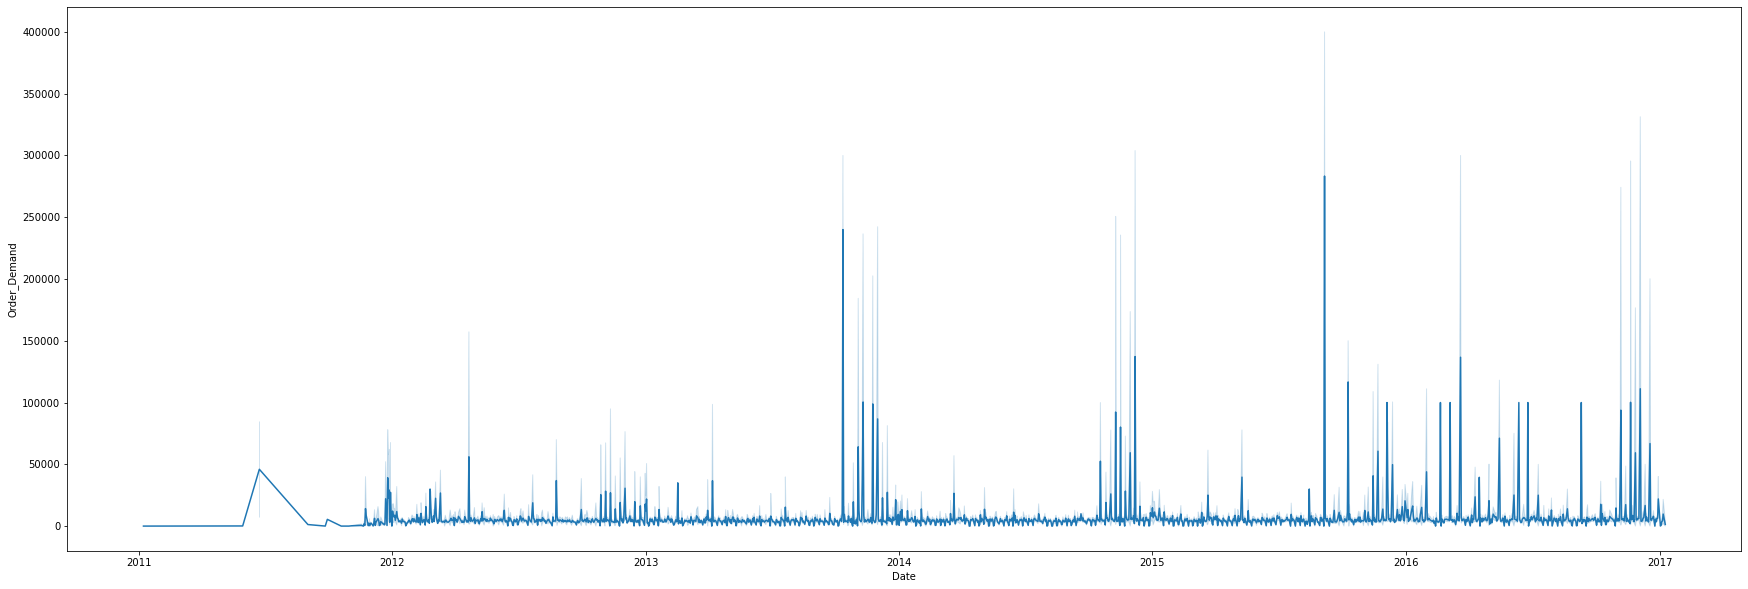

In [17]:
x = df['Date']
y = df['Order_Demand']
 # setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(30, 10))
# drawing the plot
sns.lineplot(x, y, ax=ax)
plt.show()

# Tried to do By grouping the product 
# 1. checked number of unique product code

In [18]:
# checking by group on the basis of product id
df.groupby('Product_Code').sum().sort_values('Order_Demand', ascending = False)

C:\Users\ankit\AppData\Local\Temp/ipykernel_19868/943329539.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Code').sum().sort_values('Order_Demand', ascending = False)


,Order_Demand
Product_Code,
Product_1359,472474000
Product_1248,289117000
Product_0083,210651000
Product_1341,169777000
Product_1295,123303000
...,...
Product_0638,22
Product_0853,20
Product_0465,3


# 2. checked number of unique product Category

In [19]:
# checking by group on the basis of Product_Category
df.groupby('Product_Category').sum().sort_values('Order_Demand', ascending = False)

C:\Users\ankit\AppData\Local\Temp/ipykernel_19868/88446170.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category').sum().sort_values('Order_Demand', ascending = False)


,Order_Demand
Product_Category,
Category_019,4240159257
Category_006,405571330
Category_005,199674520
Category_007,128691531
Category_028,49055354
Category_033,42610000
Category_030,40966555
Category_021,4480570
Category_032,4473048


# 3. Now groupby ['Warehouse','Product_Category','Date']

In [20]:
# checking by group on the basis of warehouse
# y=df.groupby(['Warehouse','Product_Category','Date']).sum().sort_values('Order_Demand', ascending = False)
df.groupby(['Warehouse','Product_Category','Date']).sum().sort_values('Order_Demand', ascending = False)

C:\Users\ankit\AppData\Local\Temp/ipykernel_19868/189064764.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Warehouse','Product_Category','Date']).sum().sort_values('Order_Demand', ascending = False)


Order_Demand
Warehouse Product_Category Date                    
Whse_S    Category_019     2014-06-17       6240650
                           2015-05-19       6103926
                           2012-06-11       5515425
Whse_J    Category_019     2014-03-31       5425385
                           2013-11-11       5394899
...                                             ...
                           2014-07-13             0
                           2014-05-04             0
                           2014-04-13             0
                           2014-02-11             0
Whse_A    Category_005     2014-10-20             0

[70218 rows x 1 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 44799 to 908447
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1037336 non-null  object        
 1   Warehouse         1037336 non-null  object        
 2   Product_Category  1037336 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1037336 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 79.7+ MB


# Now created dataframe on the basis of warehouse as there was vast number of product id 

In [22]:
df2 = pd.pivot_table(df,index=["Date"],values=["Order_Demand"],columns=["Warehouse"],aggfunc=np.sum)
df2.columns = df2.columns.droplevel(0)
df2#.dropna()


Warehouse,Whse_A,Whse_C,Whse_J,Whse_S
Date,,,,
2011-01-08,2.0,NaN,NaN,NaN
2011-05-31,108.0,NaN,NaN,NaN
2011-06-24,NaN,NaN,NaN,92000.0
2011-09-02,NaN,1250.0,NaN,NaN
2011-09-27,NaN,28.0,NaN,NaN
...,...,...,...,...
2017-01-03,NaN,2200.0,NaN,200.0
2017-01-04,NaN,29000.0,250.0,NaN
2017-01-05,NaN,NaN,83929.0,NaN


In [23]:
# fill nan with 0 because no sale record found
df2= df.fillna(0)

In [24]:
df2

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44799,Product_0965,Whse_A,Category_006,2011-01-08,2
131429,Product_0412,Whse_S,Category_007,2011-10-20,2
131426,Product_0125,Whse_S,Category_011,2011-10-20,2
75193,Product_0642,Whse_C,Category_019,2011-10-31,3
131026,Product_2137,Whse_S,Category_009,2011-11-18,25
...,...,...,...,...,...
919105,Product_0689,Whse_J,Category_011,2017-01-06,200
920147,Product_1970,Whse_J,Category_005,2017-01-06,2000
863020,Product_1904,Whse_C,Category_019,2017-01-09,4000
908844,Product_0471,Whse_C,Category_015,2017-01-09,30


* After doing all this I found little irrelevent to our question 

In [25]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44799,Product_0965,Whse_A,Category_006,2011-01-08,2
131429,Product_0412,Whse_S,Category_007,2011-10-20,2
131426,Product_0125,Whse_S,Category_011,2011-10-20,2
75193,Product_0642,Whse_C,Category_019,2011-10-31,3
131026,Product_2137,Whse_S,Category_009,2011-11-18,25


In [26]:
df.tail()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
919105,Product_0689,Whse_J,Category_011,2017-01-06,200
920147,Product_1970,Whse_J,Category_005,2017-01-06,2000
863020,Product_1904,Whse_C,Category_019,2017-01-09,4000
908844,Product_0471,Whse_C,Category_015,2017-01-09,30
908447,Product_0250,Whse_C,Category_007,2017-01-09,148


In [27]:
# Setting Date As index
df.set_index('Date',inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1037336 entries, 2011-01-08 to 2017-01-09
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1037336 non-null  object
 1   Warehouse         1037336 non-null  object
 2   Product_Category  1037336 non-null  object
 3   Order_Demand      1037336 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 39.6+ MB


#  To predict monthly product demand 

In [29]:
#Step 1:#Averages daily sales value for the month, and we are using the start of each month as the timestamp.
monthly_avg_sales = df['Order_Demand'].resample('MS').mean()
#In case there are Null values, they can be imputed using bfill.
monthly_avg_sales = monthly_avg_sales.fillna(monthly_avg_sales.bfill())

monthly_avg_sales.index.freq = "MS"
monthly_avg_sales.columns =['Order_Demand']
final=pd.DataFrame(monthly_avg_sales)


In [30]:
final.shape

(73, 1)

# Taking a sample data from the monthly calculated dataset  'Final'

In [31]:
train_df = final.iloc[: 45]
valid_df = final.iloc[45:]

In [32]:
train_df.shape ,valid_df.shape

((45, 1), (28, 1))

# Describe the mean ,std,... of Numerical columns

In [33]:
final.describe()

,Order_Demand
count,73.000000
mean,5080.605478
std,5202.681762
min,2.000000
25%,4539.828154
50%,4938.896517
75%,5222.581883
max,46000.000000


# Data Visualization

# Testing For Stationarity

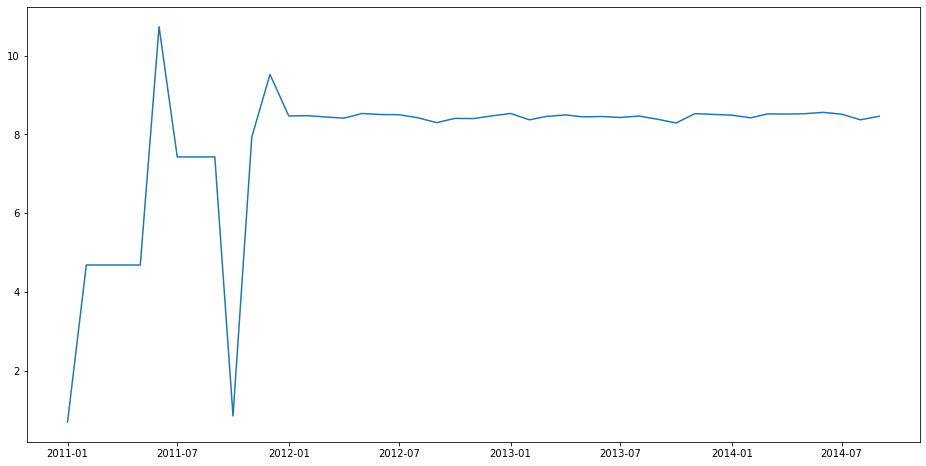

In [34]:
#Lets try transformation
plt.figure(figsize=(16,8))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(train_df['Order_Demand'])
plt.plot(ts_log)

### Testing For Stationarity

In [35]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(final['Order_Demand'])

In [36]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Close):
    result=adfuller(Close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [37]:
adfuller_test(final['Order_Demand'])

ADF Test Statistic : -9.376287725151824
p-value : 7.152791521972709e-16
#Lags Used : 0
Number of Observations Used : 72
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

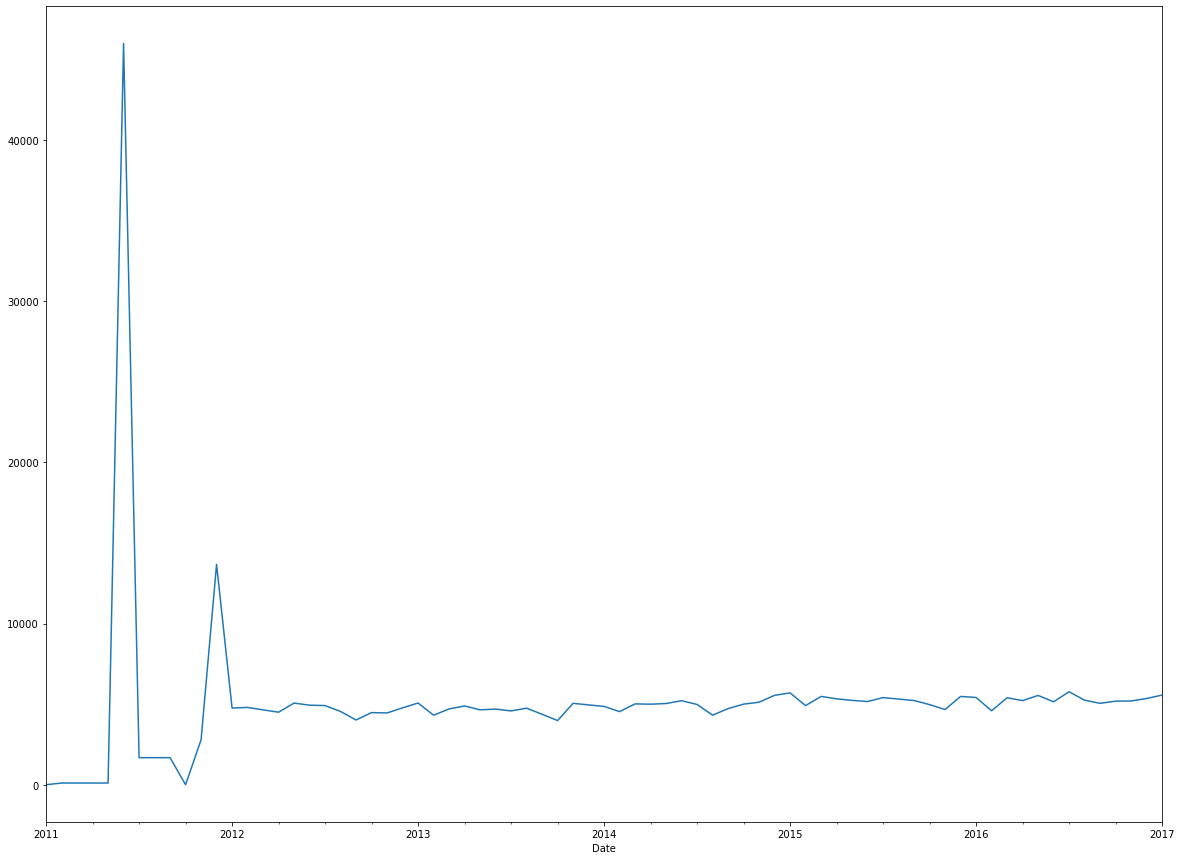

In [38]:
final['Order_Demand'].plot(figsize=(20,15))

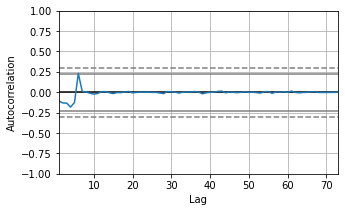

In [39]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(final['Order_Demand'])
plt.show()

In [40]:
# For non-seasonal data
#p=5, d=1, q=0 or 1

# Autoregressive Integrated Moving Average (ARIMA)


In [41]:
import pmdarima as pm

model_auto = pm.auto_arima(train_df['Order_Demand'], 
                              start_p=5, 
                              start_q=5,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
model_auto.summary()

Performing stepwise search to minimize aic
 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=922.897, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=924.390, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=924.533, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=941.227, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=926.857, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.436 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   45
Model:                        SARIMAX   Log Likelihood                -459.448
Date:                Sat, 11 Feb 2023   AIC                            922.897
Time:                        15:42:51   BIC                            926.510
Sample:                    01-01-2011   HQIC                           924.244
                         - 09-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4968.8268   2884.818      1.722      0.085    -685.314    1.06e+04
sigma2      4.323e+07   6.62e+06      6.528      0.000    3.03e+07    5.62e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):              1998.33
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             5.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
# dtrain=final['Order_Demand'].iloc[:45]
# dtest=final['Order_Demand'].iloc[45:]

In [43]:
# dtrain.info()

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod= SARIMAX(train_df,order=(1,1,1),seasonal_order=(2,1,0,4))
result=mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Order_Demand   No. Observations:                   45
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 4)   Log Likelihood                -415.899
Date:                            Sat, 11 Feb 2023   AIC                            841.797
Time:                                    15:42:51   BIC                            850.242
Sample:                                01-01-2011   HQIC                           844.850
                                     - 09-01-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0475      0.284     -0.167      0.867      -0.604       0.509
ma.L1         -0.9950      0.102     -9.722      0.000      -1.196      -0.794
ar.S.L4       -0.9387      0.101     -9.317      0.000      -1.136      -0.741
ar.S.L8       -0.7352      0.032    -23.251      0.000      -0.797      -0.673
sigma2      5.411e+07   1.96e-09   2.76e+16      0.000    5.41e+07    5.41e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               181.48
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.76e+32. Standard errors may be unstable.
"""

In [45]:
predictions = result.predict(start=len(train_df), end=len(train_df)+len(valid_df)-1, dynamic=False, typ='levels').rename('predicted')

<AxesSubplot:xlabel='Date'>

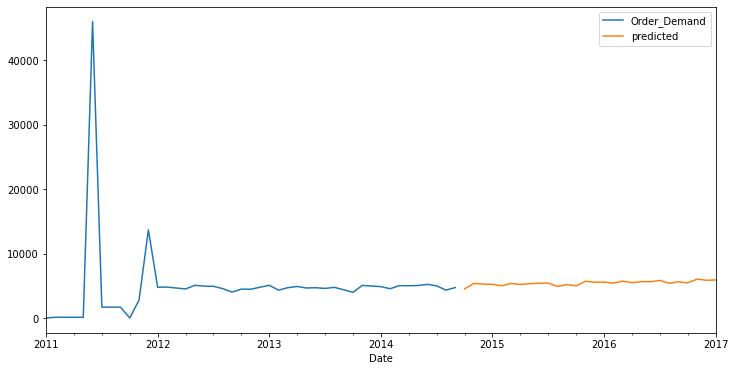

In [46]:
ax=train_df.plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)

In [47]:
from sklearn.metrics import mean_squared_error
dtest=final['Order_Demand'].iloc[45:]
error = np.sqrt(mean_squared_error(dtest, predictions))
print(f'SARIMA(2,0,2)(2,1,0,12) RMSE Error: {error:11.10}')
print('Std of Test data:                  ', final['Order_Demand'].std())

SARIMA(2,0,2)(2,1,0,12) RMSE Error: 401.9772845
Std of Test data:                   5202.681761918462


In [53]:
model = SARIMAX(final['Order_Demand'],order=(2,0,2),seasonal_order=(2,1,0,6))
results = model.fit()
fcast = results.predict(len(final['Order_Demand']),len(final['Order_Demand'])+12,typ='levels').rename('Predicted for the next 6 months')

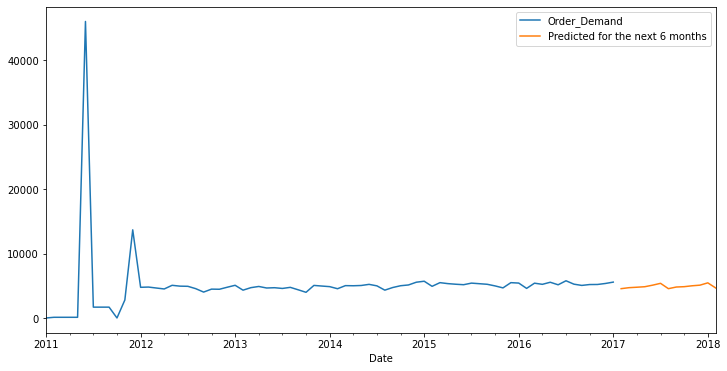

In [54]:
ax =final['Order_Demand'].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)

* Its prediction for the next 6 months

# Tried to do with other models

# Arima MOdel  order=(0, 0, 0) --- order got  by automodel

In [55]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Order_Demand'], order=(0, 0, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(train_df), len(final)-1, typ='levels')
yhat.index = valid_df.index

mse(yhat, valid_df['Order_Demand'])

from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(yhat,valid_df['Order_Demand'])
MSE = mean_squared_error(yhat,valid_df['Order_Demand'])
RMSE = np.sqrt(MSE)
print("MAE",MAE)
print("MSE",MSE)
print("RMSE",RMSE)


MAE 343.2950924599067
MSE 157979.92575549145
RMSE 397.466886363495


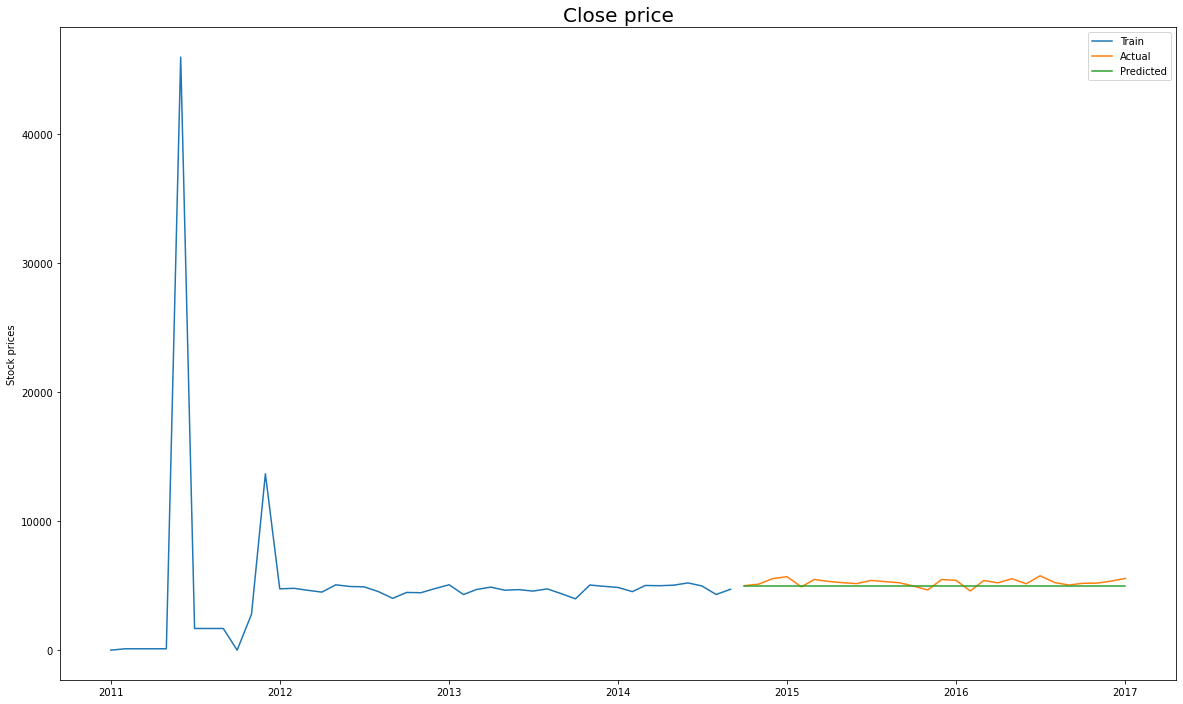

In [56]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Order_Demand'], label='Train')
plt.plot(valid_df['Order_Demand'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

# Model   SARIMAX  order=(2, 0, 2),seasonal_order=(2,1,0,4)

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=sm.tsa.statespace.SARIMAX(train_df['Order_Demand'],order=(2, 0, 2),seasonal_order=(2,1,0,4))
results=model.fit()

C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\ankit\AppData\Local\Temp/ipykernel_19868/1305164874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['forecast']=results.predict(start=40,end=74,dynamic=True)


<AxesSubplot:xlabel='Date'>

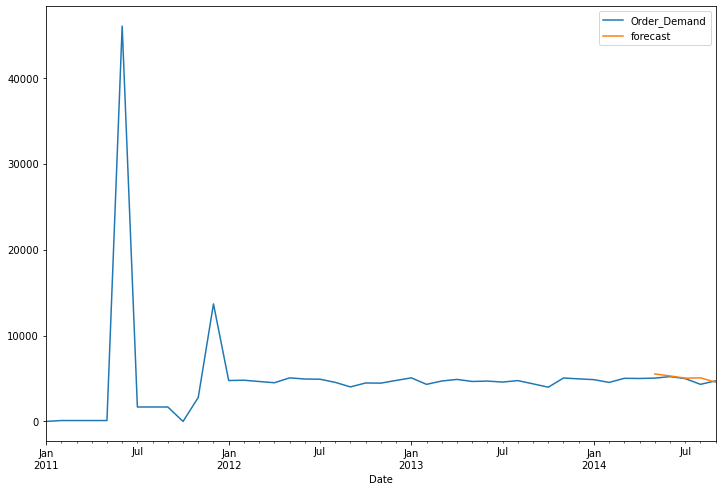

In [58]:
train_df['forecast']=results.predict(start=40,end=74,dynamic=True)
train_df[['Order_Demand','forecast']].plot(figsize=(12,8))

# Model   SARIMAX   order=(2, 1, 1),seasonal_order=(2,1,0,4)

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train_df['Order_Demand'], order=(2, 1, 1),seasonal_order=(2,1,0,4))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(train_df),len(final)-1)
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(yhat,valid_df['Order_Demand'])
MSE = mean_squared_error(yhat,valid_df['Order_Demand'])
RMSE = np.sqrt(MSE)
print("MAE",MAE)
print("MSE",MSE)
print("RMSE",RMSE)

MAE 266.6419328269025
MSE 107230.90616842089
RMSE 327.46130484138257


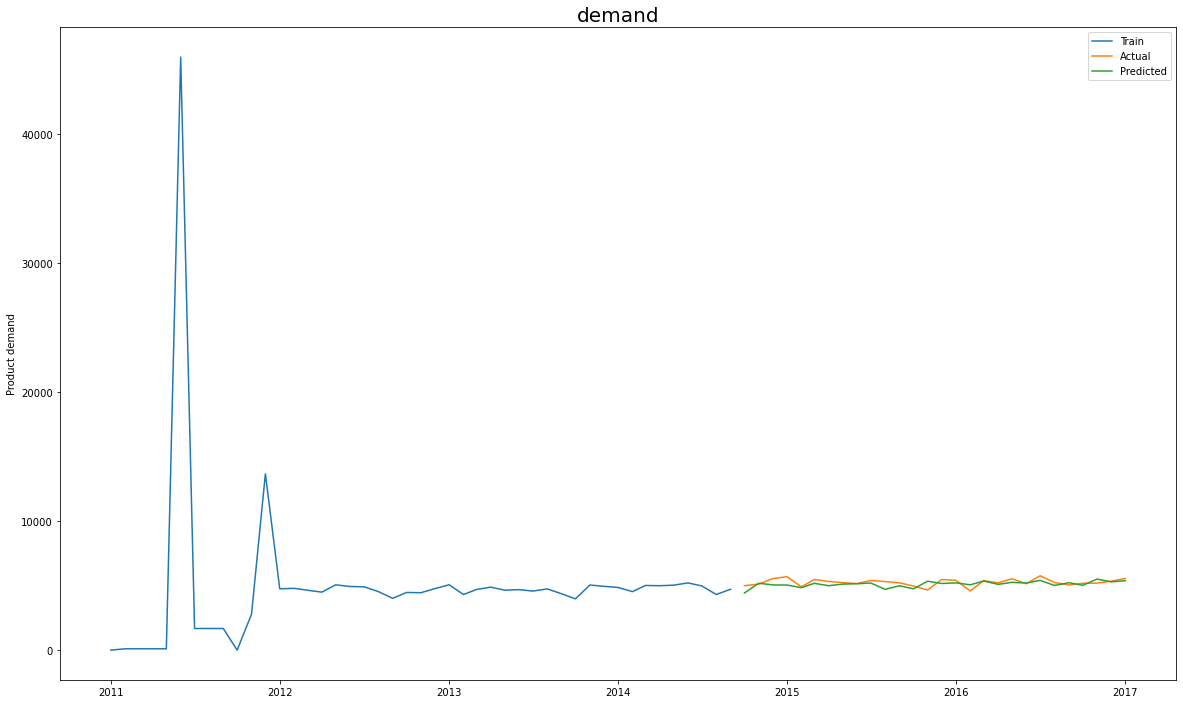

In [60]:
yhat.index = valid_df.index
mse(yhat, valid_df['Order_Demand'])
plt.figure(figsize=(20,12))
plt.plot(train_df['Order_Demand'], label='Train')
plt.plot(valid_df['Order_Demand'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Product demand")
plt.title('demand', fontsize = 20)
plt.legend()
plt.show()